# Problem Set 2: Intro to Pandas

## Part 1

In this problem set we are going to be working with a processed O-D dataset, Pandas, and Matplotlib.

First, a short example will introduce us to the dataset, some data wrangling functions of Pandas, and a few plots with Matplotlib. 
The OD data was collected based on cell phone towers. Usually, OD datasets are quite big, and contain individual data points, with origin-destination information between cell phone towers. In this case, the dataset has previously been aggregated and processed. While the text files are still very big, their size is significantly smaller than the original dataset. 
The files that follow the "Rn_OD_X-Y" naming structure contain the origin-destination flow from hour X to hour Y with the following columns:

* Origin tower ID
* Destination tower ID
* Closest road intersection to origin 
* Closest intersection to destination
* Origin-destination flow

The file "towers_index.txt" contains the locations of all the cell towers with the following columns. The row number is the id of the cell tower starting with 1.

* Latitude
* Longitude
* Node ID of the closest intersection to the tower

Throughout the exercises we will be continuously using Pandas and some of its merging functionality to join the numerous OD files available. We will be building exploratory data visualizations, finding urban patterns and locating divergent areas within the dataset. Some useful documentation for merging data with Pandas can be found at:


http://pandas.pydata.org/pandas-docs/stable/merging.html

First, lets import some of our libraries. If you haven't installed seaborn already, please type on your command line:

```Python
pip install seaborn
```

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# This line lets us plot on our ipython notebook
%matplotlib inline

Let’s read one of the OD files with Pandas. Since the file has no header, we need to provide the header names. Luckily, we have all the information we need on the `DATA_STRUCTURES.txt` file. 

In [5]:
df_01=pd.read_csv("data/Hourly Flows/Rn_OD_0-1.txt", header=None, 
    names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
df_01.head(2)

,oid,did,close_rid_origin,close_rid_dest,flow
0,1,2,20404,16208,1
1,1,20,20404,11056,3


We need to import every file with a separate function. 

`Hint: You can import multiple files with a for loop, or building a function, without having to declare them individually`

In [7]:
df_12=pd.read_csv("data/Hourly Flows/Rn_OD_1-2.txt", header=None, 
               names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
df_12.head(2)

,oid,did,close_rid_origin,close_rid_dest,flow
0,1,14,20404,18826,1
1,1,23,20404,16864,1


If you notice, the df structure of both files is similar. We can perform a SQL style join based on a column or index on either of the df’s. In this case, since the rest of the columns are the same, we are only keeping the flow column of the second df.

`Hint: You can merge multiple files with a for loop, or building a function, without having to do so individually`

In [8]:
combined_flow = df_01.join(df_12['flow'], lsuffix='0-1', rsuffix='1-2')
combined_flow[:2]

,oid,did,close_rid_origin,close_rid_dest,flow0-1,flow1-2
0,1,2,20404,16208,1,1
1,1,20,20404,11056,3,1


We can visualize our newly merged tables with a basic area plot. This plot visualizes the flow within the cell phone towers throughout the 2 different time ranges. By slicing the dataset, we are only plotting some of the towers. 

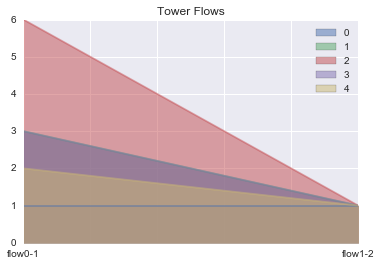

In [9]:
combined_flow[:5][['flow0-1','flow1-2']].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')


**Based on the code snippets, and your previous code your job is to build:**

* A function that merges the 24 hour ranges into a single DataFrame. The function must have the following inputs/outputs:
    1. Inputs: 
      1. A file path to extract the different files from
      * A column name to merge into a single DataFrame
      * A list of column names for the DataFrame
    2. Outputs: 
      1. A DataFrame with the merged columns

In [10]:
## 1.A File path to extract the different files from
def file_path(i):
    j=i+1
    path = "data/Hourly Flows/Rn_OD_i-j.txt"
    path = path.replace("i",str(i))
    path = path.replace("j",str(j))
    print path
for i in range(0,2):
    file_path(i)

data/Hourly Flows/Rn_OD_0-1.txt
data/Hourly Flows/Rn_OD_1-2.txt


In [11]:
## 1.B & 1.C Column Name and A list of Column Names to merge into a single DataFrame
mylist = []
def add_list(i):
    j= i+1
    a = "flow"+str(i)+"-"+str(j)
    mylist.append(a)
    
    if (i == 23) :
        print mylist

for i in range(0,24):
    add_list(i)

['flow0-1', 'flow1-2', 'flow2-3', 'flow3-4', 'flow4-5', 'flow5-6', 'flow6-7', 'flow7-8', 'flow8-9', 'flow9-10', 'flow10-11', 'flow11-12', 'flow12-13', 'flow13-14', 'flow14-15', 'flow15-16', 'flow16-17', 'flow17-18', 'flow18-19', 'flow19-20', 'flow20-21', 'flow21-22', 'flow22-23', 'flow23-24']


In [12]:
# write a read file function

def read(i):
    j=i+1
    df=pd.read_csv("data/Hourly Flows/Rn_OD_"+str(i)+"-"+str(j)+".txt", header=None, 
               names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', ("flow"+str(i)+"-"+str(j))])
    print df.head(3)
for i in range(0,3):
    read(i)

   oid  did  close_rid_origin  close_rid_dest  flow0-1
0    1    2             20404           16208        1
1    1   20             20404           11056        3
2    1   38             20404           18943        6
   oid  did  close_rid_origin  close_rid_dest  flow1-2
0    1   14             20404           18826        1
1    1   23             20404           16864        1
2    1   38             20404           18943        1
   oid  did  close_rid_origin  close_rid_dest  flow2-3
0    1   20             20404           11056        1
1    1  170             20404           19595        1
2    1  225             20404           17826        1


['flow1-2', 'flow2-3', 'flow3-4', 'flow4-5', 'flow5-6', 'flow6-7', 'flow7-8', 'flow8-9', 'flow9-10', 'flow10-11', 'flow11-12', 'flow12-13', 'flow13-14', 'flow14-15', 'flow15-16', 'flow16-17', 'flow17-18', 'flow18-19', 'flow19-20', 'flow20-21', 'flow21-22', 'flow22-23', 'flow23-24']
   oid  did  close_rid_origin  close_rid_dest  flow0-1  flow1-2  flow2-3  \
0    1    2             20404           16208        1        1        1   
1    1   20             20404           11056        3        1        1   

   flow3-4  flow4-5  flow5-6    ...      flow14-15  flow15-16  flow16-17  \
0        1        1        1    ...              1          2          2   
1        1        1        1    ...              1          2          1   

   flow17-18  flow18-19  flow19-20  flow20-21  flow21-22  flow22-23  flow23-24  
0          1          2          1          1         25          1          6  
1          1          1          2         20          2          1          1  

[2 rows x 28 co

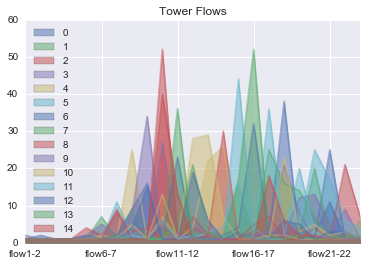

In [13]:
# Add your code below:

## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## This line lets us plot on our ipython notebook
%matplotlib inline

## Read and Define basic dataframe df which contains a column 'flow0-1'
df = pd.read_csv("data/Hourly Flows/Rn_OD_0-1.txt", header=None, 
               names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow0-1'])

## Define a list of column names
mylist = []
def add_list(i):
    j= i+1
    a = "flow"+str(i)+"-"+str(j)
    mylist.append(a)
    
    if (i == 23) :
        print mylist

## Define a function "combine_file" 
## that add column named "flowi-j" from the directory "data/Hourly Flows/Rn_OD_i-j.txt"
def combine_file(i):
    global df
    j=i+1
    df_i=pd.read_csv("data/Hourly Flows/Rn_OD_"+str(i)+"-"+str(j)+".txt", header=None, 
               names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', ("flow"+str(i)+"-"+str(j))])
    df = df.join(df_i["flow"+str(i)+"-"+str(j)])
    
    if (i == 23) :
        print df[:2]

## add column from i= 1 to i = 24    
for i in range(1,24):
    add_list(i)
    combine_file(i)
print "************"    
print df.head()   
## Plot the graph
df[:15][mylist[0:24]].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')

* Using all the towers: Make an area plot that shows the relationship between OD flows throughout the 24 hr ranges.

** Choose ONE of the following TWO questions.**
* An area plot with **four** different areas:
    1. The average flow values across **all** towers
    2. The maximum flow values across **all** towers
    3. The minimum flow values across **all** towers
    4. The median flow values across **all** towers

In [14]:
# Add your code below:

## Function "mean_list(i)" to caculate and write a list of mean values
meanList = []
def mean_list(i):
    j=i+1
    MEAN = df[("flow"+str(i)+"-"+str(j))].mean()
    MEAN = round(MEAN,2)
    meanList.append(MEAN)
    
    if (i == 23) :
        print meanList
        
## Function "max_list(i)" to caculate and write a list of max values
maxList = []
def max_list(i):
    j=i+1
    MAX = df[("flow"+str(i)+"-"+str(j))].max()
    MAX = round(MAX,2)
    maxList.append(MAX)
    
    if (i == 23) :
        print maxList        

## Function "min_list(i)" to caculate and write a list of min values
minList = []
def min_list(i):
    j=i+1
    MIN = df[("flow"+str(i)+"-"+str(j))].min()
    MIN = round(MIN,2)
    minList.append(MIN)
    
    if (i == 23) :
        print minList      
        
## Function "median" and "median_List(i)"
import numpy
def median(lst):
    return numpy.median(numpy.array(lst))

medList = []
def med_list(i):
    j=i+1
    MED = df[("flow"+str(i)+"-"+str(j))].median()
    MED = round(MED,2)
    medList.append(MED)
    
    if (i == 23) :
        print medList
        
for i in range(0,24):
    mean_list(i)
    max_list(i)
    min_list(i)
    med_list(i)

[1.18, 1.14, 1.11, 1.11, 1.11, 1.1, 1.16, 1.21, 1.31, 1.41, 1.51, 1.56, 1.53, 1.5, 1.46, 1.55, 1.68, 1.66, 1.66, 1.63, 1.61, 1.52, 1.42, 1.28]
[47.0, 19.0, 12.0, 7.0, 12.0, 22.0, 21.0, 28.0, 49.0, 48.0, 61.0, 64.0, 89.0, 100.0, 130.0, 147.0, 171.0, 169.0, 221.0, 254.0, 243.0, 203.0, 163.0, 81.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


['flow0-1', 'flow1-2', 'flow2-3', 'flow3-4', 'flow4-5', 'flow5-6', 'flow6-7', 'flow7-8', 'flow8-9', 'flow9-10', 'flow10-11', 'flow11-12', 'flow12-13', 'flow13-14', 'flow14-15', 'flow15-16', 'flow16-17', 'flow17-18', 'flow18-19', 'flow19-20', 'flow20-21', 'flow21-22', 'flow22-23', 'flow23-24']
   flow0-1  flow1-2  flow2-3  flow3-4  flow4-5  flow5-6  flow6-7  flow7-8  \
0     1.18     1.14     1.11     1.11     1.11      1.1     1.16     1.21   
1    47.00    19.00    12.00     7.00    12.00     22.0    21.00    28.00   
2     0.00     1.00     1.00     1.00     1.00      1.0     1.00     1.00   
3     1.00     1.00     1.00     1.00     1.00      1.0     1.00     1.00   

   flow8-9  flow9-10    ...      flow14-15  flow15-16  flow16-17  flow17-18  \
0     1.31      1.41    ...           1.46       1.55       1.68       1.66   
1    49.00     48.00    ...         130.00     147.00     171.00     169.00   
2     1.00      1.00    ...           1.00       1.00       1.00       1.00   
3   

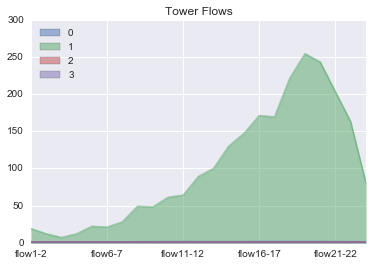

In [15]:
## add rows to the dataframe "df2"
columnList = []
def column_list(i):
    j= i+1
    a = "flow"+str(i)+"-"+str(j)
    columnList.append(a)
    
    if (i == 23) :
        print columnList

for i in range(0,24):
    column_list(i)
    
s1 = meanList
s2 = maxList
s3 = minList
s4 = medList
index = [0, 1, 2, 3]
df2 = pd.DataFrame(columns=[columnList[0:24]], index=index)
df2.loc[0:4] = [s1, list(s2), s3, list(s4)]
print df2

df2[:10][mylist].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')

* Based on the overall trends that you just noticed with the previous plots, construct:
    1. An area plot based on the values of 5 towers with flow values that are closer to the average trend.
    2. An area plot based on the outlier values. You will plot 3 towers with flow values that are closer to the minimum trend, and towers with flow values that are closer to the maximum trend.

In [3]:
# Add your code below:
print "Already choose the first question"

Already choose the first question


## Part 2

Now we will use the additional file provided to display the geographical location of every tower. We will first import the file and look at its structure. Since the file has no header, we will use the information provided on the `DATA_STRUCTURES.txt` file. The row number corresponds to the tower index; in order to relate every tower with the OD files, we will add an additional column with the row number as an index. We can do so with the following `DataFrame` function:
```Python
DataFrame.reset_index(level=0, inplace=True)
```


In [39]:
towers=pd.read_csv("data/Hourly Flows/towers_index.txt", header=None, 
               names=['Latitude', 'Longitude', 'Closest node ID'])
print towers.head(2) # see the old dataframe before re_index
# Use the row value as the index column
towers.reset_index(level=0, inplace=True) # re_index the dataframe 'towers', which is very important
towers.head(2) # see the new dataframe after re_index

   Latitude  Longitude  Closest node ID
0    24.517     46.776            20404
1    24.517     46.890            16208


,index,Latitude,Longitude,Closest node ID
0,0,24.517,46.776,20404
1,1,24.517,46.890,16208


If you look at the structure of the OD file, every tower is repeated several times: for every origin tower, there are several destinations. In SQL terms, we can use a `one-to-many` relationship to assign the geographic values of the towers, to the origin or destination towers. By joining a `DataFrame` `on` a given column, Pandas will assign the row value of every element that matches the value of the given column on the other `DataFrame`. We will also group the origin values of the OD Dataframe, and get their average before joining it with the towers’ geographical location. 

In [49]:
df_01=pd.read_csv("data/Hourly Flows/Rn_OD_0-1.txt", header=None, 
    names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
print df_01.head(2)

# join with the tower df based on the oid
OD_location = df_01.join(towers, on='oid')
OD_location.head(3)
grouped_01 = OD_location[['flow','oid','Latitude','Longitude','Closest node ID']].groupby('oid').mean()
print grouped_01.head(2)
grouped_01.reset_index(level=0, inplace=True)
print grouped_01.head(2)

   oid  did  close_rid_origin  close_rid_dest  flow
0    1    2             20404           16208     1
1    1   20             20404           11056     3
         flow  Latitude  Longitude  Closest node ID
oid                                                
1    1.846154    24.517      46.89            16208
3    1.000000    24.524      46.71            18805
   oid      flow  Latitude  Longitude  Closest node ID
0    1  1.846154    24.517      46.89            16208
1    3  1.000000    24.524      46.71            18805


In [51]:
# from the OD df, use only two columns, then group them by 'oid'
grouped_01 = df_01[['flow','oid']].groupby('oid').mean()
print grouped_01.head(2)
old_str= grouped_01.dtypes # see old structure before reset_index

# RE_INDEX******use the oid as a column, not the index, this is very important
grouped_01.reset_index(level=0, inplace=True) # change the True to False to see the different
print grouped_01.head(2) # compare old and new types
new_str= grouped_01.dtypes
print "The Old Structure Before reset_index Is: ************ \n" + str(old_str)
print "The New Structure After reset_index Is: ************ \n" + str(new_str)

# join with the tower df based on the oid
OD_location = grouped_01.join(towers, on='oid')
OD_location.head(2)

         flow
oid          
1    1.846154
3    1.000000
   oid      flow
0    1  1.846154
1    3  1.000000
The Old Structure Before reset_index Is: ************ 
flow    float64
dtype: object
The New Structure After reset_index Is: ************ 
oid       int64
flow    float64
dtype: object


,oid,flow,index,Latitude,Longitude,Closest node ID
0,1,1.846154,1,24.517,46.89,16208
1,3,1.000000,3,24.524,46.71,18805


Now that we have a new `DataFrame` with an average flow value for every origin tower, and their corresponding geographical location, we can use their lat/lon values to create a scatter plot. We can even vary their size based on the average flow. Since the flow variation across tower is not that big, we can use a log function to better visualize it on our plot. Numpy has a quick log implementation:
```Python
np.log(value)
```


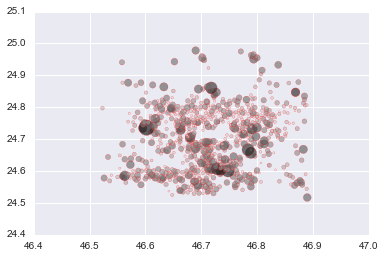

In [9]:
## Since the flow variation across tower is not that big, 
## we can use a log function to better visualize it on our plot. 
## Numpy has a quick log implementation:

import matplotlib.cm as cm

color = OD_location['flow']

plt.scatter(OD_location['Longitude'],OD_location['Latitude'], 
            s=np.log(OD_location['flow'])*100, 
            edgecolors = 'red', color = (np.log(np.log(OD_location['flow'])*5)), alpha = 0.6)
plt.show()

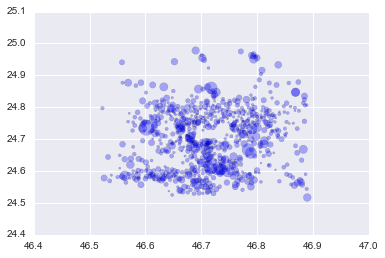

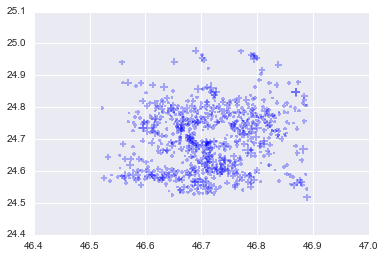

In [10]:
## change the alpha, edgecolor and color of the plots

plt.scatter(OD_location['Longitude'],OD_location['Latitude'], 
            s=np.log(OD_location['flow'])*100, 
            edgecolors = 'black', color = "blue", alpha = 0.3)
plt.show()

## change the maker shape to "+", size and linewidth of the plots

plt.scatter(OD_location['Longitude'],OD_location['Latitude'], 
            s=np.log(OD_location['flow'])*100, marker='+',linewidth = 2, 
            edgecolors = 'black', color = "blue", alpha = 0.3)
plt.show()

**Based on the code snippets, and your previous code your job is to build:**

* A function that creates a [color range](http://matplotlib.org/users/colormaps.html) based on a `numpy array` of numeric values [(Example 1)](http://stackoverflow.com/questions/12965075/matplotlib-scatter-plot-colour-as-function-of-third-variable), [(Example 2)](http://stackoverflow.com/questions/11364745/how-can-i-turn-a-numpy-array-into-a-matplotlib-colormap). The function must have the following inputs/outputs:
    1. Inputs: 
      1. A `numpy` `array` or a `Pandas DataSeries`
      * Two different colors to interpolate values between.
    2. Outputs: 
      1. A `numpy array` of `colors` or `color values` 
      

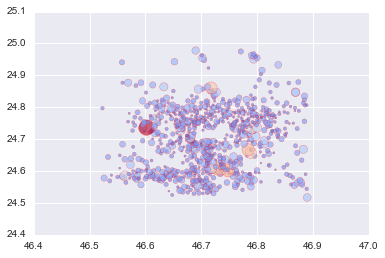

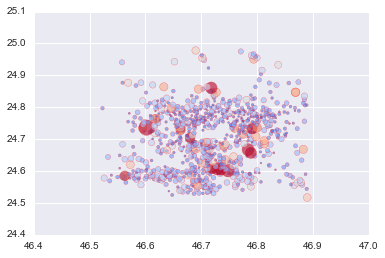

In [75]:
## Solution One: use cmap function
import matplotlib.cm as cm
color = np.log(OD_location['flow'])
plt.scatter(OD_location['Longitude'],OD_location['Latitude'], 
            s=np.log(OD_location['flow'])*100, 
            edgecolors='red', color=color, alpha=0.6,cmap=plt.cm.coolwarm)
plt.show()

## Or use cmap=plt.cm.coolwarm() at first
colors = plt.cm.coolwarm(color)
plt.scatter(OD_location['Longitude'],OD_location['Latitude'], 
            s=np.log(OD_location['flow'])*100, 
            edgecolors = 'red', color = colors, alpha = 0.6)
plt.show()

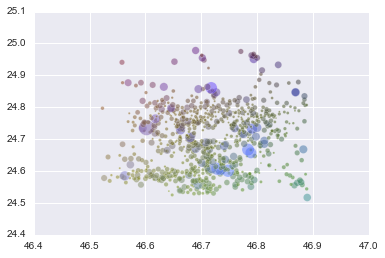

In [153]:
## Solution two: Flip the column and rows of the np.array to make array of colors
import matplotlib.cm as cm
import numpy as np

## Construct a array "c"
x=OD_location['Longitude']
y=OD_location['Latitude']
size=np.log(OD_location['flow'])
c=np.array([x,y,size])
# Flip the array
c=c.T
c=abs(np.sin(c))
## use the fliped c as color values
plt.scatter(x,y, 
            s=size*100, 
            edgecolors = 'white', color = c, alpha = 0.5)
plt.show()

### All the plots below should be scatter plots. Parameterize the size of the points to the obtained values.

* A plot that visualizes the average flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped and averaged by 'oid'
    * The flow values must be averaged across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10]
    avg_flow = 7.5
    ```

In [ ]:
print grouped_list.head(1)
print towers.head(1)

please enter a hour to observe____15


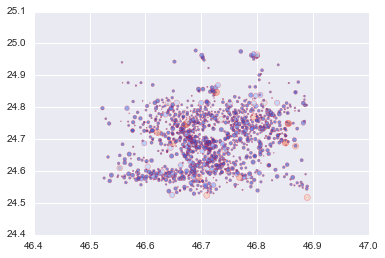

the plot shows MEAN value of flow15-16


In [219]:
grouplist = columnList + ["oid"]
grouplist

MEAN= df[grouplist].groupby('oid').mean()
MAX= df[grouplist].groupby('oid').max()
MIN= df[grouplist].groupby('oid').min()

# use the oid as a column, not the index
MEAN.reset_index(level=0, inplace=True)
MAX.reset_index(level=0, inplace=True)
MIN.reset_index(level=0, inplace=True)

# join with the tower df based on the oid
MEAN = MEAN.join(towers, on='oid')
MAX = MAX.join(towers, on='oid')
MIN = MIN.join(towers, on='oid')

# create a function plot(i) to plot
def plot_mean(i):
    j=i+1
    x=MEAN['Longitude']
    y=MEAN['Latitude']
    global flow
    flow = "flow"+str(i)+"-"+str(j)
    size = np.log(MEAN[flow])
    color = np.log(np.log(MEAN[flow]))
    colors = plt.cm.coolwarm(color)
    plt.scatter(x,y, 
            s=size*20, 
            edgecolors = 'red', color = colors, alpha = 0.6)
    plt.show()

i = input("please enter a hour to observe____")    
plot_mean(i)
print "the plot shows MEAN value of " + flow

* A plot that visualizes the maximum flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped by 'oid', you can then use these values to find the `max()`
    * Use those flow values to find the `max()` across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100]
    max_flow = 100
    ```

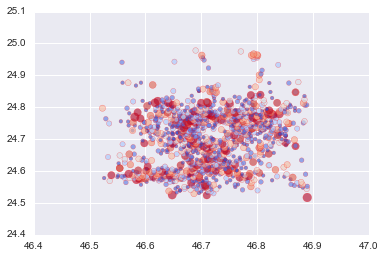

the plot shows MAX value of flow15-16


In [220]:
# create a function plot(i) to plot
def plot_max(i):
    j=i+1
    x=MAX['Longitude']
    y=MAX['Latitude']
    global flow
    flow = "flow"+str(i)+"-"+str(j)
    size = np.log(MAX[flow])
    color = np.log(np.log(MAX[flow]))
    colors = plt.cm.coolwarm(color)
    plt.scatter(x,y, 
            s=size*20, 
            edgecolors = 'red', color = colors, alpha = 0.6)
    plt.show()

plot_max(i)
print "the plot shows MAX value of " + flow

* A plot that visualizes the minimum flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped by 'oid', you can then use these values to find the `min()`
    * Use those flow values to find the `min()` across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100]
    min_flow = 5
    ```

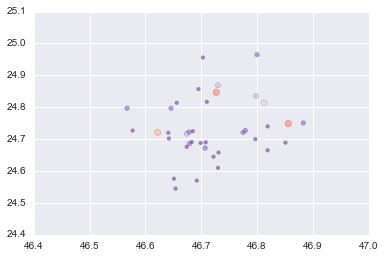

the plot shows MIN value of flow15-16


In [221]:
# Add your code below:
# create a function plot(i) to plot
def plot_min(i):
    j=i+1
    x=MIN['Longitude']
    y=MIN['Latitude']
    global flow
    flow = "flow"+str(i)+"-"+str(j)
    size = np.log(MIN[flow])
    color = np.log(np.log(MIN[flow]))
    colors = plt.cm.coolwarm(color)
    plt.scatter(x,y, 
            s=size*20, 
            edgecolors = 'red', color = colors, alpha = 0.6)
    plt.show()

plot_min(i)
print "the plot shows MIN value of " + flow

## Graphic Presentation
#### Make sure to label all the axis, add legends and units (where appropriate).


## Code Quality
#### While code performance and optimization won't count, all the code should be highly readable, and reusable. Where possible, create functions, build helper functions where needed, and make sure the code is self-explanatory.